# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(
        rescale=1./255,)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 221s 869ms/step - loss: 0.6400 - accuracy: 0.6296 - val_loss: 0.5658 - val_accuracy: 0.7050
Epoch 2/25
250/250 [==============================] - 48s 193ms/step - loss: 0.5660 - accuracy: 0.7042 - val_loss: 0.5238 - val_accuracy: 0.7455
Epoch 3/25
250/250 [==============================] - 48s 190ms/step - loss: 0.5223 - accuracy: 0.7405 - val_loss: 0.5591 - val_accuracy: 0.7160
Epoch 4/25
250/250 [==============================] - 48s 191ms/step - loss: 0.4976 - accuracy: 0.7549 - val_loss: 0.4768 - val_accuracy: 0.7750
Epoch 5/25
250/250 [==============================] - 48s 193ms/step - loss: 0.4767 - accuracy: 0.7715 - val_loss: 0.5410 - val_accuracy: 0.7270
Epoch 6/25
250/250 [==============================] - 48s 192ms/step - loss: 0.4615 - accuracy: 0.7810 - val_loss: 0.4744 - val_accuracy: 0.7810
Epoch 7/25
250/250 [==============================] - 49s 195ms/step - loss: 0.4408 - accuracy: 0.7884 - val_loss: 0.5377 - val_a

## Part 4 - Making a single prediction

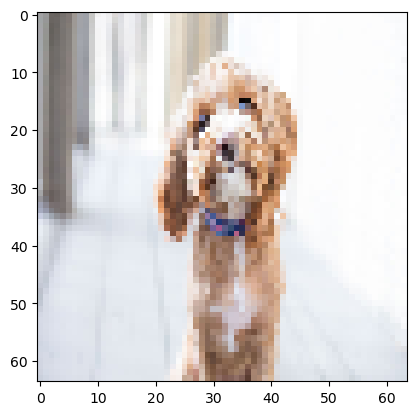

1/1 [==============================] - 0s 32ms/step
dog


In [41]:
import numpy as np
import matplotlib.pyplot as plt

pred_image = tf.keras.utils.load_img('dataset/d.jpg', target_size = (64, 64))
plt.imshow(pred_image)
plt.show()
pred_image = tf.keras.utils.img_to_array(pred_image)
pred_image = np.expand_dims(pred_image, axis = 0)
training_set.class_indices
result =  cnn.predict(pred_image)
if result[0][0] == 1:
    print('dog')
else:
    print('cat')